In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'RDpccHJvZ2V0dGlcYmxvZ1xwb3N0c1wyMDI1LTA5LTE1X0JBTV90YXNzaQ=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\paolo\AppData\Local\Temp\ipykernel_33236\3465741973.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap.py": 1701716518.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap_external.py": 1701716518.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\zipimport.py": 1701716520.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\codecs.py": 1701716518.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\aliases.py": 1701716518.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\__init__.py": 1701716518.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\utf_8.py": 1701716518.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\cp1252.py": 1701716518.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\abc.py": 1701716518.0, "C:\\Users\\paolo\\AppData\\Local\\Programs\\Python\\Python

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)   # mostra tutte le colonne
pd.set_option("display.max_colwidth", None)  # non troncare i contenuti delle celle
pd.set_option("display.width", None)         # non troncare la tabella a destra

import sqlite3
import matplotlib.pyplot as plt
from pathlib import Path
import re
import os

In [3]:
DB_PATH = "D:/files/Bankit.sqlite" 
conn = sqlite3.connect(DB_PATH)
tabella = 'MIR0300'
df = pd.read_sql(f"SELECT DATA_OSS, SERIE, VALORE FROM {tabella} order by 2 desc,1", conn)
df["DATA_OSS"] = pd.to_datetime(df["DATA_OSS"])

def parse_tokens(s: str):
    parts = str(s).split(".")
    return pd.Series({
        "COD_MIR": parts[3] if len(parts) > 3 else None,
        "COD_DURATA": parts[4] if len(parts) > 4 else None,
        "COD_IMPORTO": parts[6] if len(parts) > 6 else None,
    })

parsed = df["SERIE"].apply(parse_tokens)
df = pd.concat([df, parsed], axis=1)
map_labels = {
    "MIR5411": "Prestiti", # diversi dai conti correnti, prestiti rotativi e carte di credito
    "MIR5414": "Prestiti garantiti", #  diversi dai conti correnti, prestiti rotativi e carte di credito
    "MIR5427": "Prestiti effettivi", # diversi dai conti correnti, prestiti rotativi e carte di credito
    "5": "< 1Y",
    "9": "Tot.",
    "46": "< 1M€",
    "47": "> 1M€",
    "1000": "Tot",
}
df["MIR_DESC"]     = df["COD_MIR"].map(map_labels)
df["DURATA_DESC"]  = df["COD_DURATA"].map(map_labels)
df["IMPORTO_DESC"] = df["COD_IMPORTO"].map(map_labels)
def compose_label(row):
    parts = []
    if pd.notna(row.get("MIR_DESC")):     parts.append(row["MIR_DESC"])
    if pd.notna(row.get("DURATA_DESC")):  parts.append(row["DURATA_DESC"])
    if pd.notna(row.get("IMPORTO_DESC")): parts.append(row["IMPORTO_DESC"])
    return " - ".join(parts) if parts else None
df["SERIE_DECOD"] = df.apply(compose_label, axis=1)
tab = df.pivot_table(
    index="DATA_OSS",
    columns="SERIE_DECOD",
    values="VALORE",
    aggfunc="sum"
).sort_index(ascending=False)
tab

SERIE_DECOD,Prestiti - < 1Y - Tot,Prestiti - Tot. - < 1M€,Prestiti - Tot. - > 1M€,Prestiti - Tot. - Tot,Prestiti effettivi - Tot. - < 1M€,Prestiti effettivi - Tot. - > 1M€,Prestiti effettivi - Tot. - Tot,Prestiti garantiti - Tot. - < 1M€,Prestiti garantiti - Tot. - > 1M€,Prestiti garantiti - Tot. - Tot
DATA_OSS,,,,,,,,,,
2025-07-31,41444.7,15353.1,33000.7,48353.8,14135.6,25695.1,39830.7,2634.3,3081.0,5715.3
2025-06-30,45444.2,17544.1,33380.4,50924.5,16423.3,27418.5,43841.8,2693.5,3115.1,5808.6
2025-05-31,32798.8,14223.6,22332.3,36555.9,13264.9,17487.6,30752.5,2321.8,2272.2,4594.0
2025-04-30,34468.3,14037.4,24656.4,38693.8,12779.1,19764.9,32544.0,2384.9,2183.7,4568.6
2025-03-31,42751.6,16958.8,33118.5,50077.3,15719.1,25212.7,40931.8,2710.8,3540.5,6251.4
...,...,...,...,...,...,...,...,...,...,...
2003-05-31,24050.6,12057.6,15851.6,27909.2,0.0,0.0,0.0,0.0,0.0,0.0
2003-04-30,24476.0,11797.4,16525.0,28322.4,0.0,0.0,0.0,0.0,0.0,0.0
2003-03-31,23604.2,12203.1,15033.9,27237.1,0.0,0.0,0.0,0.0,0.0,0.0


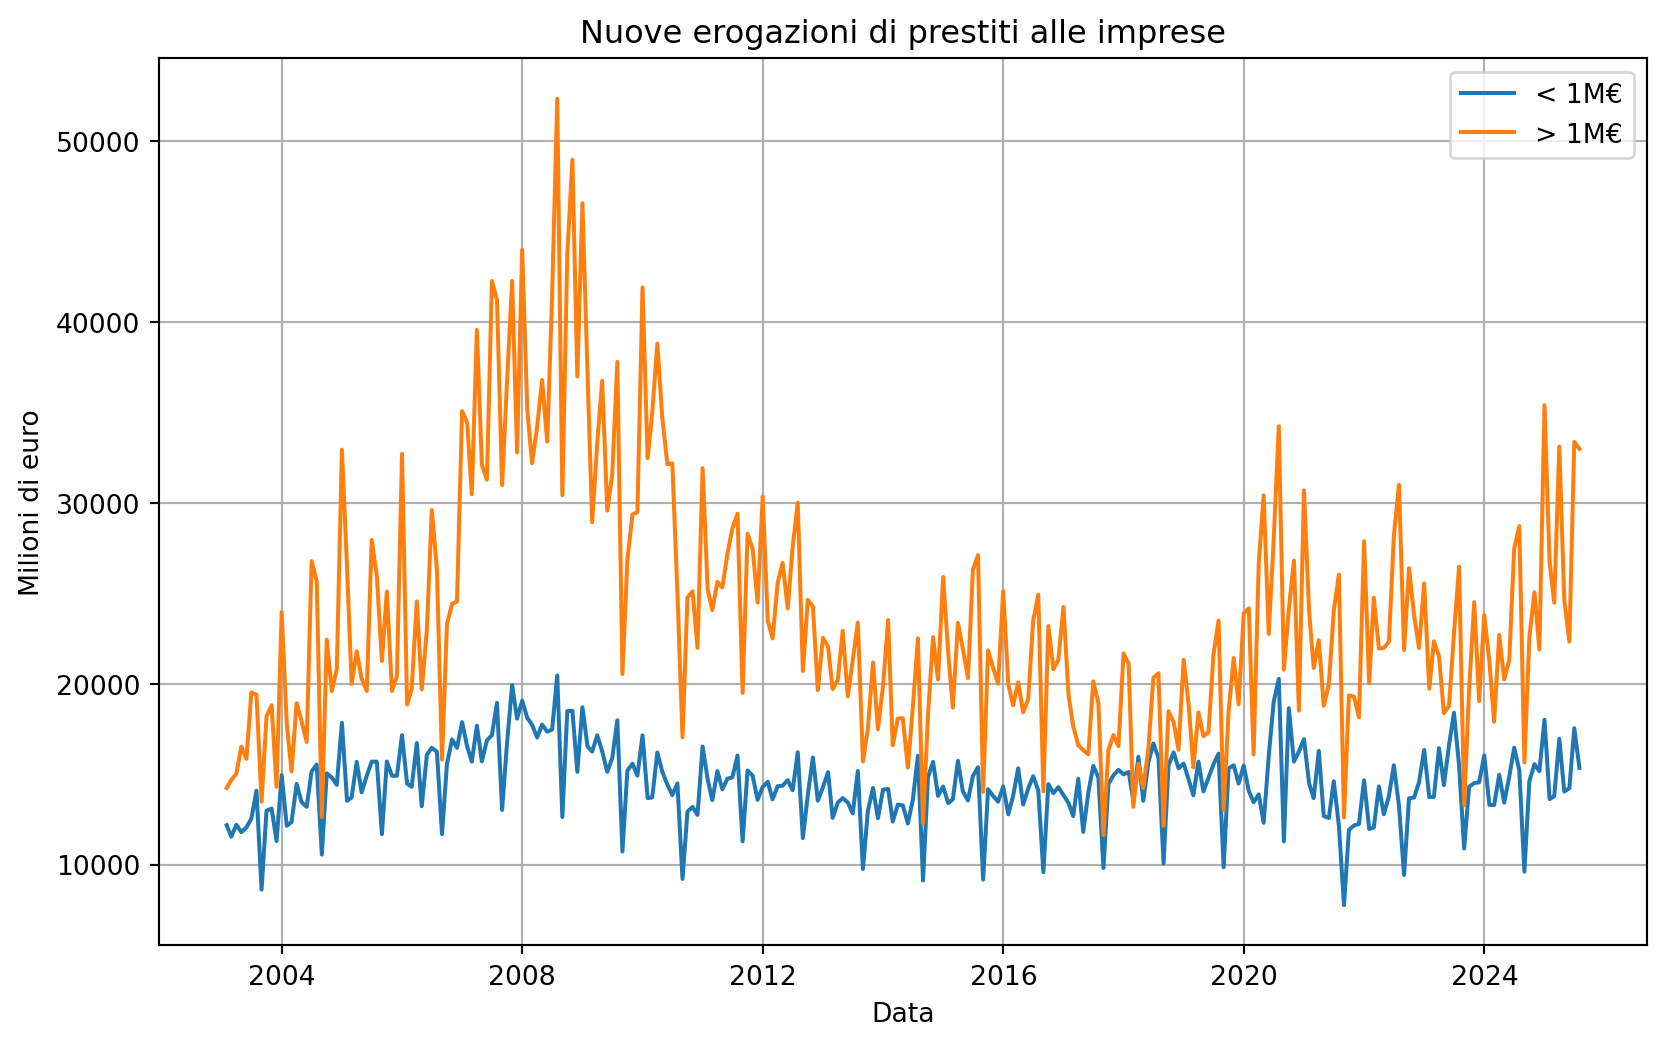

In [4]:
import matplotlib.pyplot as plt

prestiti = tab[[
    "Prestiti - Tot. - Tot",
    "Prestiti - Tot. - < 1M€",
    "Prestiti - Tot. - > 1M€"
]]

plt.figure(figsize=(10,6))
# plt.plot(prestiti.index, prestiti["Prestiti - Tot. - Tot"], label="Totale")
plt.plot(prestiti.index, prestiti["Prestiti - Tot. - < 1M€"], label="< 1M€")
plt.plot(prestiti.index, prestiti["Prestiti - Tot. - > 1M€"], label="> 1M€")

plt.title("Nuove erogazioni di prestiti alle imprese")
plt.xlabel("Data")
plt.ylabel("Milioni di euro")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Calcolo di prestiti_smooth come media mobile a 6 mesi
prestiti_smooth = (
    tab[[
        "Prestiti - Tot. - Tot",
        "Prestiti - Tot. - < 1M€",
        "Prestiti - Tot. - > 1M€"
    ]]
    .rolling(window=6, min_periods=1, center=True)
    .mean()
)

prestiti_smooth.head(12)

SERIE_DECOD,Prestiti - Tot. - Tot,Prestiti - Tot. - < 1M€,Prestiti - Tot. - > 1M€
DATA_OSS,,,
2025-07-31,45278.066667,15706.933333,29571.133333
2025-06-30,43632.000000,15289.550000,28342.450000
2025-05-31,44921.060000,15623.400000,29297.660000
2025-04-30,43813.016667,15316.666667,28496.350000
2025-03-31,42481.550000,15028.083333,27453.466667
2025-02-28,42898.333333,15106.433333,27791.900000
2025-01-31,42983.850000,15264.083333,27719.766667
2024-12-31,43304.833333,15517.666667,27787.166667
2024-11-30,41155.200000,15125.416667,26029.783333


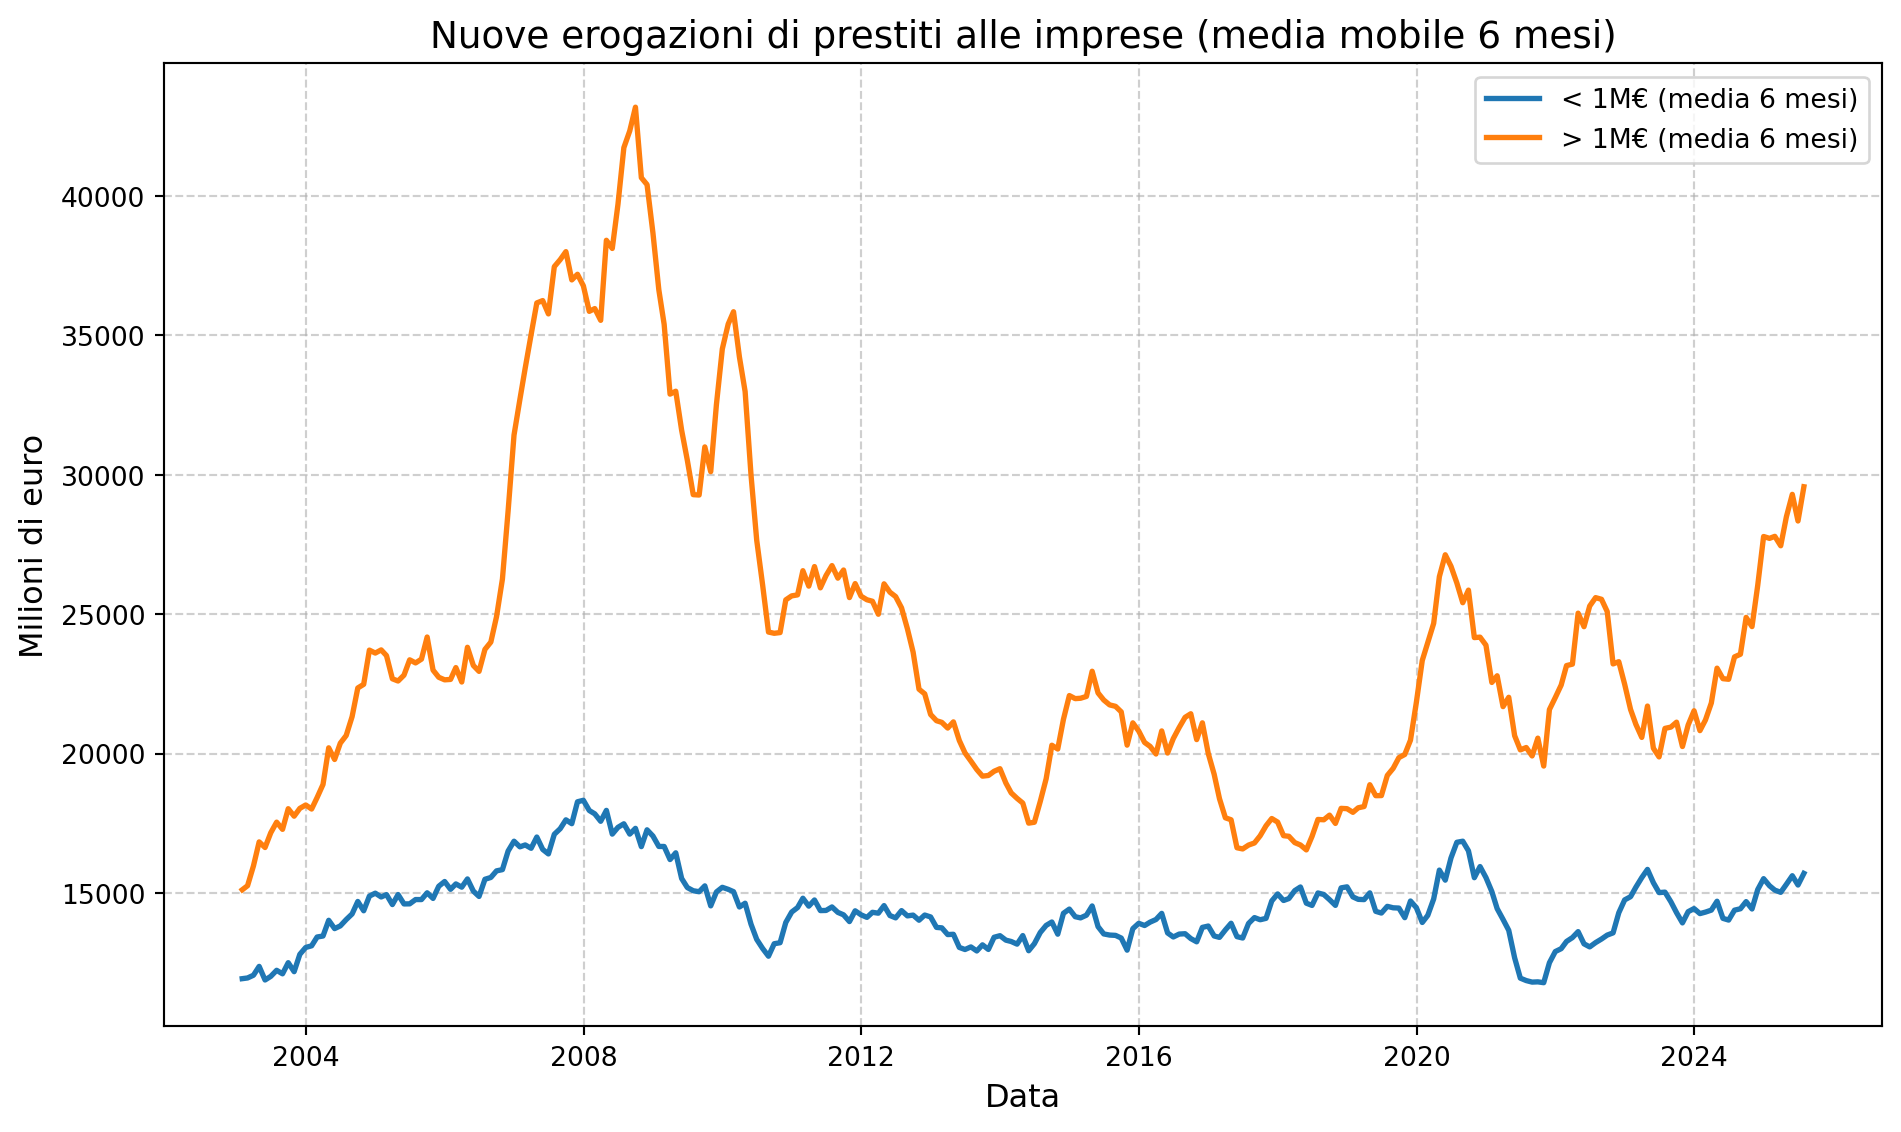

In [6]:
plt.figure(figsize=(10,6))
plt.plot(prestiti_smooth.index, prestiti_smooth["Prestiti - Tot. - < 1M€"], 
         label="< 1M€ (media 6 mesi)", linewidth=2, color="tab:blue")
plt.plot(prestiti_smooth.index, prestiti_smooth["Prestiti - Tot. - > 1M€"], 
         label="> 1M€ (media 6 mesi)", linewidth=2, color="tab:orange")

plt.title("Nuove erogazioni di prestiti alle imprese (media mobile 6 mesi)", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Milioni di euro", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

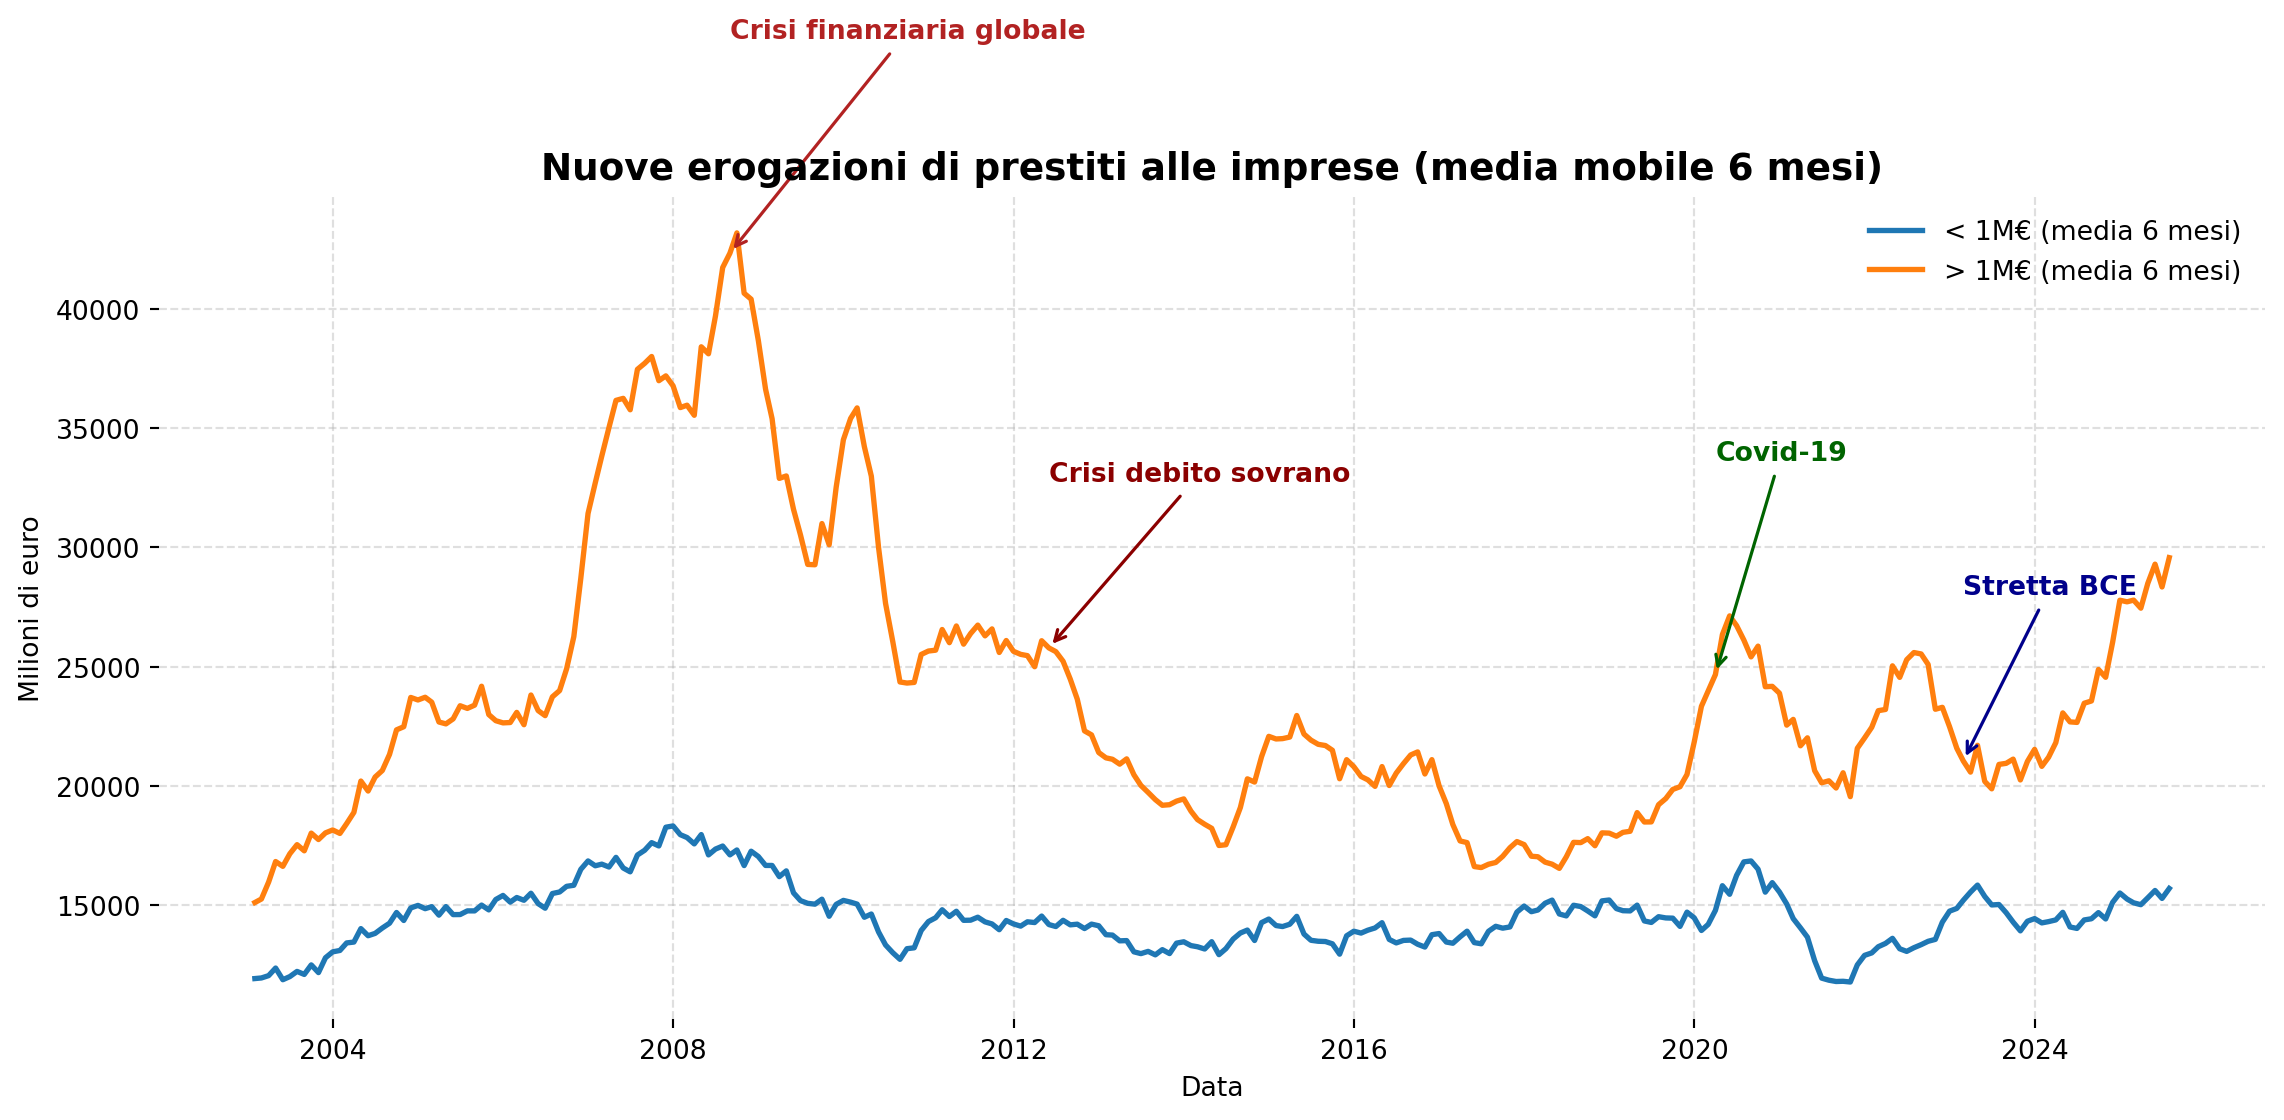

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col_big = "Prestiti - Tot. - > 1M€"
col_small = "Prestiti - Tot. - < 1M€"

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(prestiti_smooth.index, prestiti_smooth[col_small], label="< 1M€ (media 6 mesi)", linewidth=2)
ax.plot(prestiti_smooth.index, prestiti_smooth[col_big],   label="> 1M€ (media 6 mesi)", linewidth=2)

ax.set_title("Nuove erogazioni di prestiti alle imprese (media mobile 6 mesi)", fontsize=14, weight="bold")
ax.set_xlabel("Data"); ax.set_ylabel("Milioni di euro")
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend(frameon=False)

def annotate_event(date_str, text, color="#333", y_offset=8000):
    """Aggancia l’annotazione al timestamp dell’indice più vicino a date_str."""
    d = pd.to_datetime(date_str)
    # trova l’indice più vicino
    idx = prestiti_smooth.index.get_indexer([d], method="nearest")[0]
    x = prestiti_smooth.index[idx]
    y = prestiti_smooth.loc[x, col_big]
    if np.isnan(y):
        # fallback: se NaN su quella serie, usa l'altra
        y = prestiti_smooth.loc[x, col_small]
    ax.annotate(
        text, xy=(x, y), xytext=(x, y + y_offset),
        arrowprops=dict(arrowstyle="->", color=color, lw=1.2),
        fontsize=10, color=color, weight="bold"
    )

# Annotazioni (usa date approssimate: la funzione sceglie il punto più vicino)
annotate_event("2008-09-01", "Crisi finanziaria globale", "#b22222", y_offset=9000)
annotate_event("2012-06-01", "Crisi debito sovrano",     "#8b0000", y_offset=7000)
annotate_event("2020-04-01", "Covid-19",                 "#006400", y_offset=9000)
annotate_event("2023-03-01", "Stretta BCE",              "#00008b", y_offset=7000)

# ax.axvspan(pd.Timestamp("2008-09-01"), pd.Timestamp("2009-06-01"), color="#b22222", alpha=0.08)

# Spine pulite
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt

col_big = "Prestiti - Tot. - > 1M€"
col_small = "Prestiti - Tot. - < 1M€"
base_date = "2020-01-01"

# Copia del dataframe
prestiti_base100 = prestiti.copy()

# Normalizzazione in base 100 dal primo valore disponibile ≥ 2020-01
for col in [col_big, col_small]:
    base_value = prestiti_base100.loc[prestiti_base100.index >= base_date, col].iloc[0]
    prestiti_base100[col] = prestiti_base100[col] / base_value * 100

# Applica smoothing con media mobile 6 mesi centrata
prestiti_smooth100 = prestiti_base100.rolling(window=6, center=True).mean()

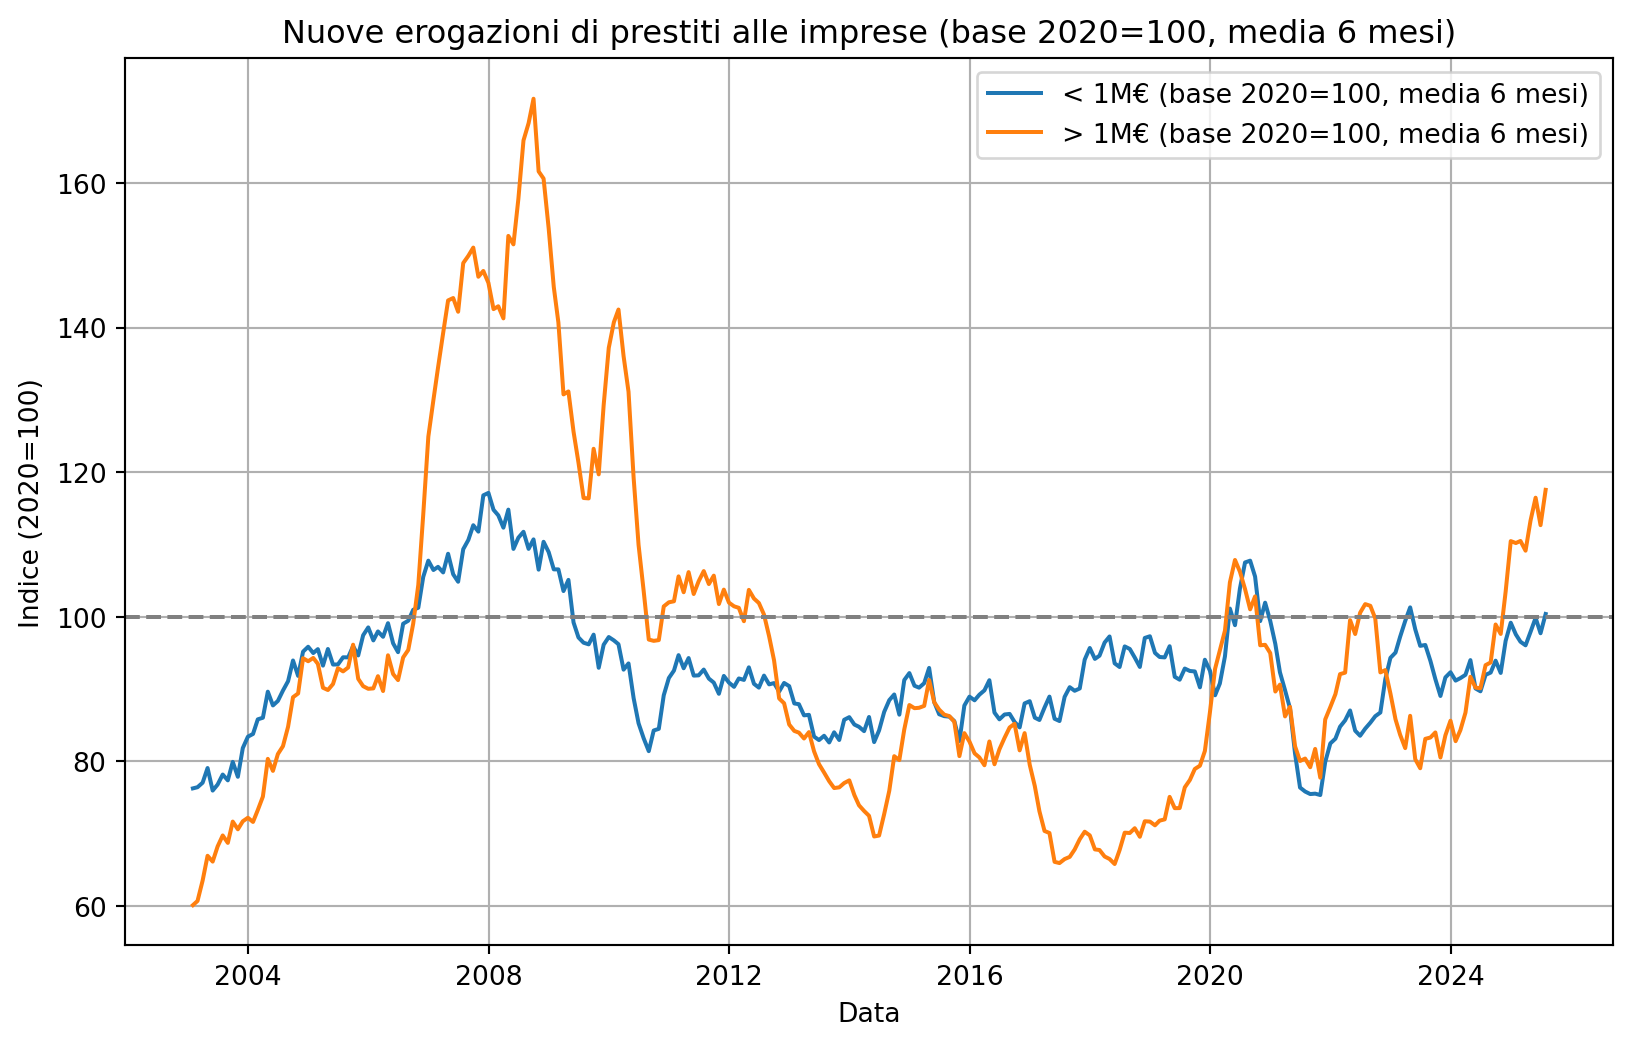

In [9]:
base_year = 2020
prestiti_base = prestiti_smooth.loc[str(base_year)]

# calcolo della media 2020 per ogni colonna
base_values = prestiti_base.mean()

prestiti_index = prestiti_smooth / base_values * 100

plt.figure(figsize=(10,6))
plt.plot(prestiti_index.index, prestiti_index[col_small], label="< 1M€ (base 2020=100, media 6 mesi)")
plt.plot(prestiti_index.index, prestiti_index[col_big], label="> 1M€ (base 2020=100, media 6 mesi)")

plt.axhline(100, color="gray", linestyle="--")
plt.title("Nuove erogazioni di prestiti alle imprese (base 2020=100, media 6 mesi)")
plt.xlabel("Data")
plt.ylabel("Indice (2020=100)")
plt.legend()
plt.grid(True)
plt.show()

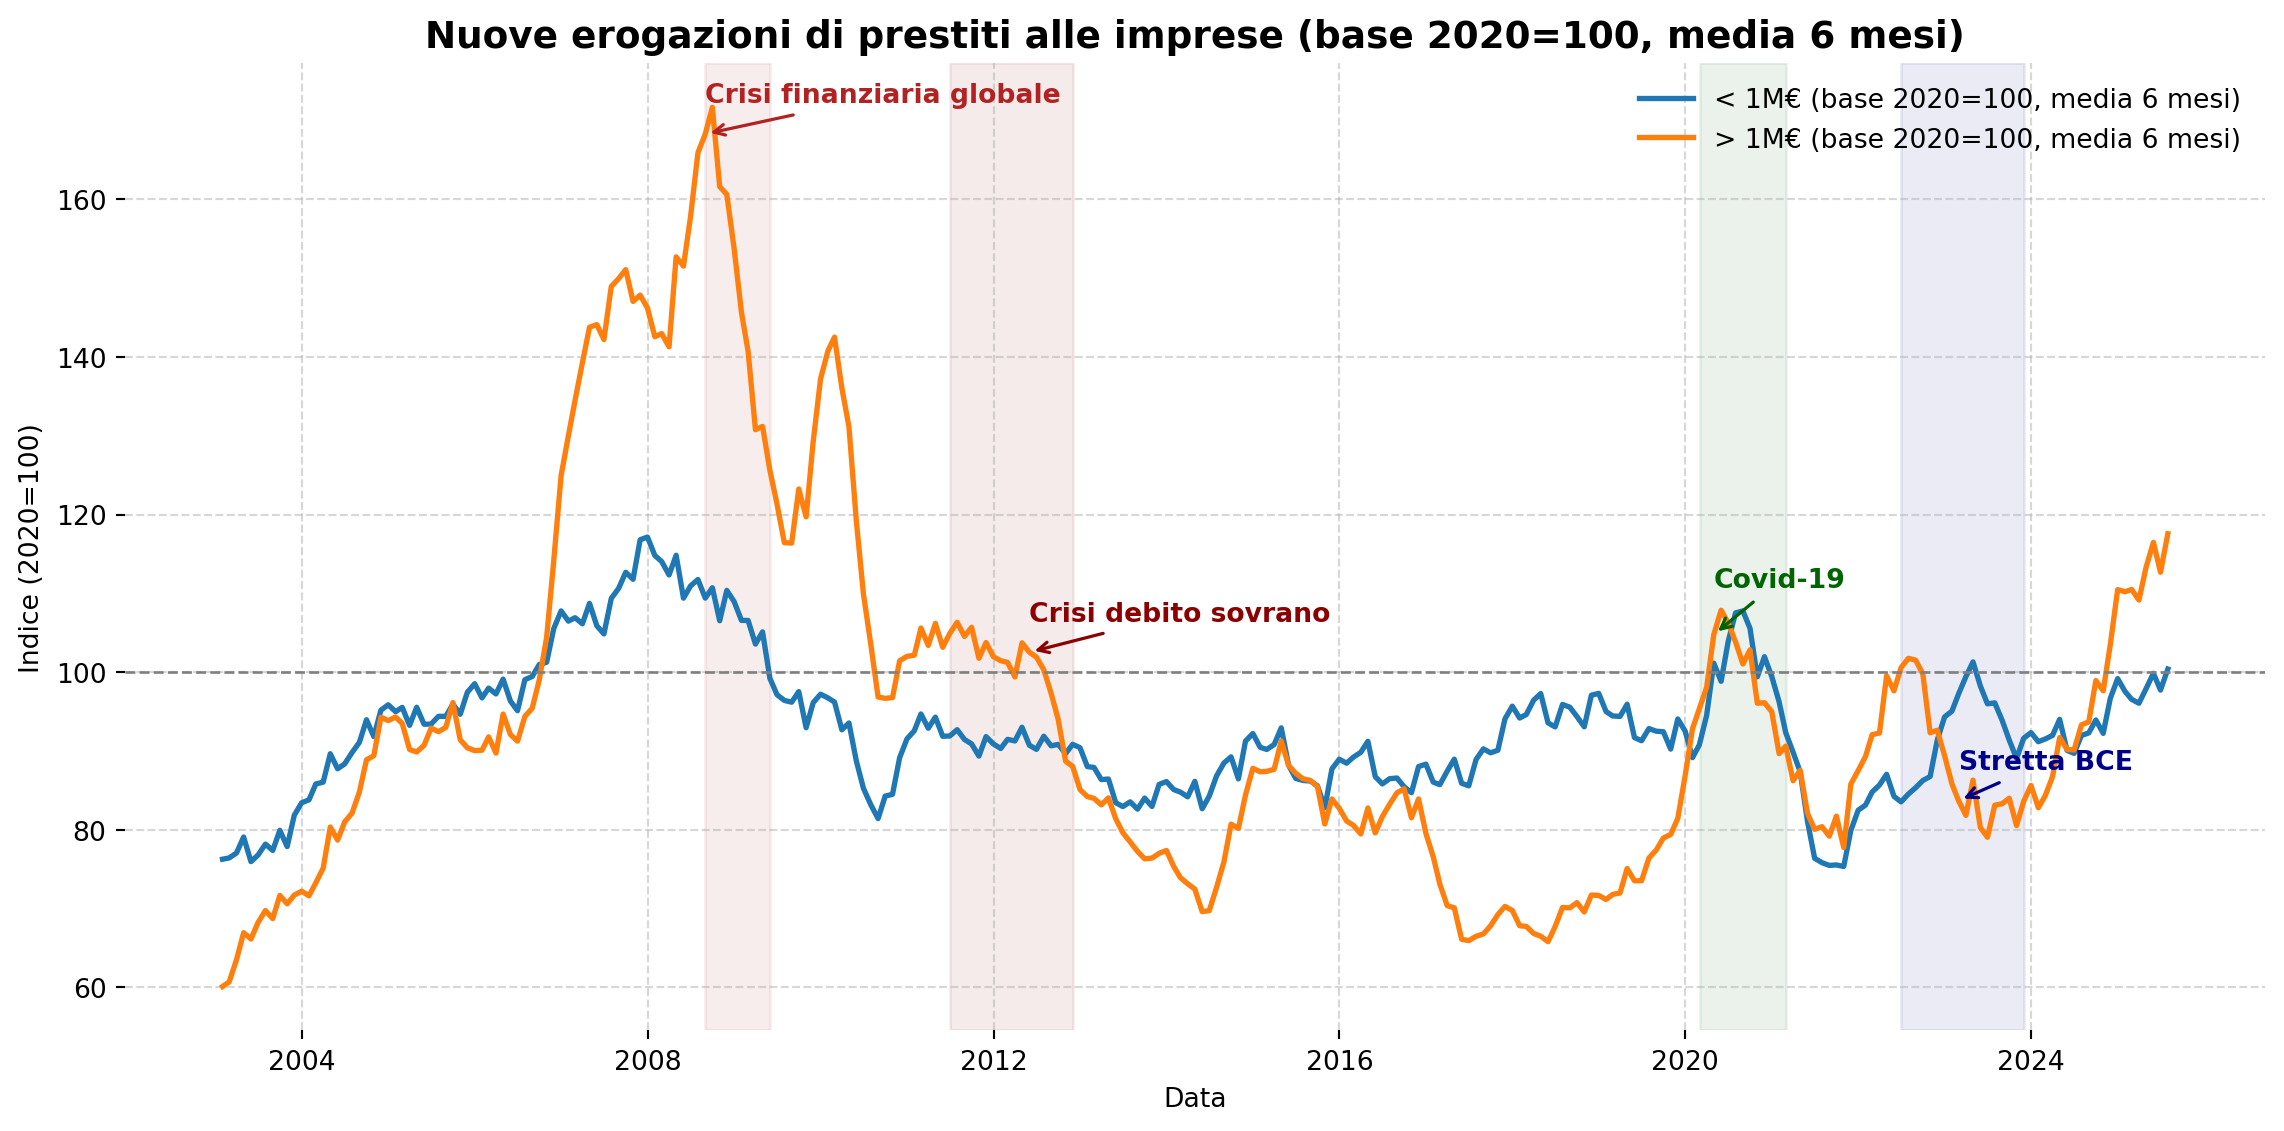

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col_small = "Prestiti - Tot. - < 1M€"
col_big   = "Prestiti - Tot. - > 1M€"

# --- funzione annotazione robusta (aggancia al punto più vicino) ---
def annotate_event(ax, df, date_str, text, series_col, color="#333", y_offset=6):
    d = pd.to_datetime(date_str)
    idx = df.index.get_indexer([d], method="nearest")[0]
    x  = df.index[idx]
    y  = df.loc[x, series_col]
    ax.annotate(text, xy=(x, y), xytext=(x, y + y_offset),
                arrowprops=dict(arrowstyle="->", color=color, lw=1.2),
                fontsize=10, color=color, weight="bold")

# --- plot base 2020=100 con media 6 mesi (già in prestiti_index) ---
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(prestiti_index.index, prestiti_index[col_small],
        label="< 1M€ (base 2020=100, media 6 mesi)", lw=2, color="#1f77b4")
ax.plot(prestiti_index.index, prestiti_index[col_big],
        label="> 1M€ (base 2020=100, media 6 mesi)", lw=2, color="#ff7f0e")

ax.set_title("Nuove erogazioni di prestiti alle imprese (base 2020=100, media 6 mesi)",
             fontsize=14, weight="bold")
ax.set_xlabel("Data"); ax.set_ylabel("Indice (2020=100)")
ax.axhline(100, color="gray", ls="--", lw=1)
ax.grid(True, ls="--", alpha=0.5)

# --- bande verticali per i periodi-chiave ---
bands = [
    ("2008-09-01", "2009-06-01", "#b22222", 0.08, "Crisi 2008-09"),
    ("2011-07-01", "2012-12-01", "#8b0000", 0.08, "Crisi debito sovrano"),
    ("2020-03-01", "2021-03-01", "#006400", 0.08, "Covid-19"),
    ("2022-07-01", "2023-12-01", "#00008b", 0.08, "Stretta BCE"),
]
for start, end, color, alpha, _ in bands:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=alpha)

# --- frecce/etichette (uso la serie >1M€ per ancorare le frecce) ---
annotate_event(ax, prestiti_index, "2008-09-01", "Crisi finanziaria globale",
               col_big, color="#b22222", y_offset=4)
annotate_event(ax, prestiti_index, "2012-06-01", "Crisi debito sovrano",
               col_big, color="#8b0000", y_offset=4)
annotate_event(ax, prestiti_index, "2020-05-01", "Covid-19",
               col_big, color="#006400", y_offset=6)
annotate_event(ax, prestiti_index, "2023-03-01", "Stretta BCE",
               col_big, color="#00008b", y_offset=4)

# legenda pulita e stile minimal
ax.legend(frameon=False, loc="upper right")
for s in ax.spines.values():
    s.set_visible(False)

plt.tight_layout()
plt.show()

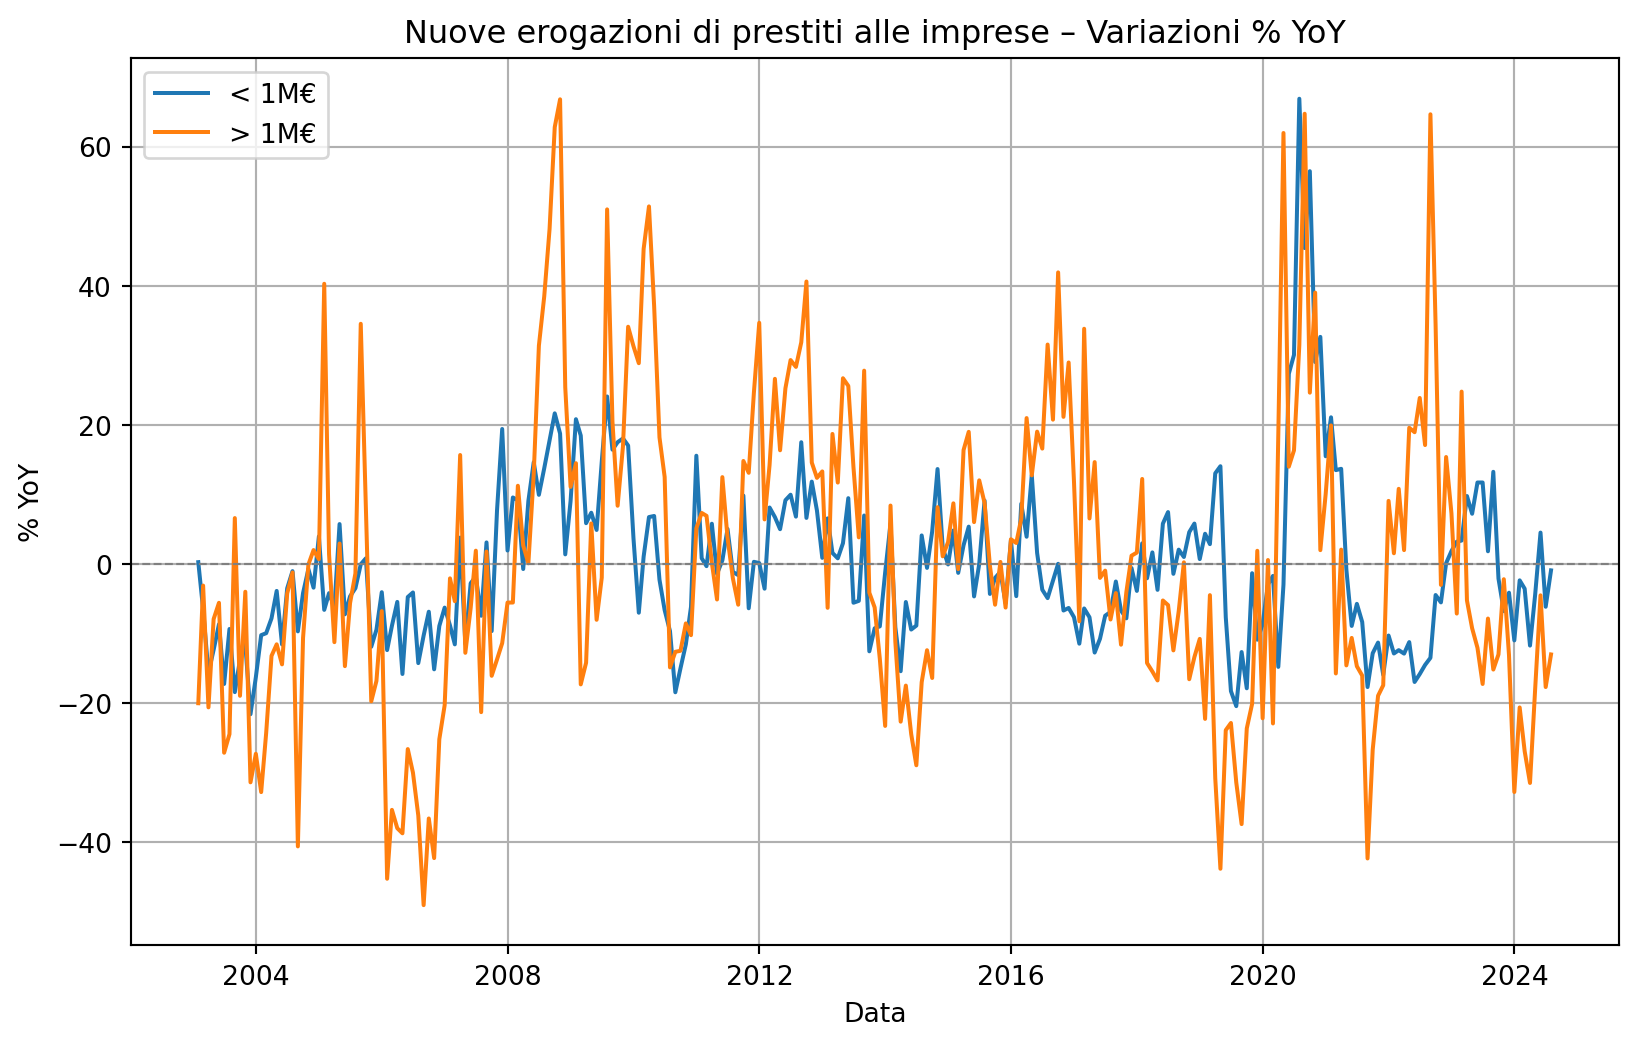

In [11]:
# Calcola YoY (variazione % rispetto a 12 mesi prima)
prestiti_yoy = prestiti.pct_change(periods=12) * 100

plt.figure(figsize=(10,6))
plt.plot(prestiti_yoy.index, prestiti_yoy["Prestiti - Tot. - < 1M€"], label="< 1M€")
plt.plot(prestiti_yoy.index, prestiti_yoy["Prestiti - Tot. - > 1M€"], label="> 1M€")

plt.axhline(0, color="gray", linewidth=0.8, linestyle="--")
plt.title("Nuove erogazioni di prestiti alle imprese – Variazioni % YoY")
plt.xlabel("Data")
plt.ylabel("% YoY")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\paolo\AppData\Local\Temp\ipykernel_33236\1647229207.py:7: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



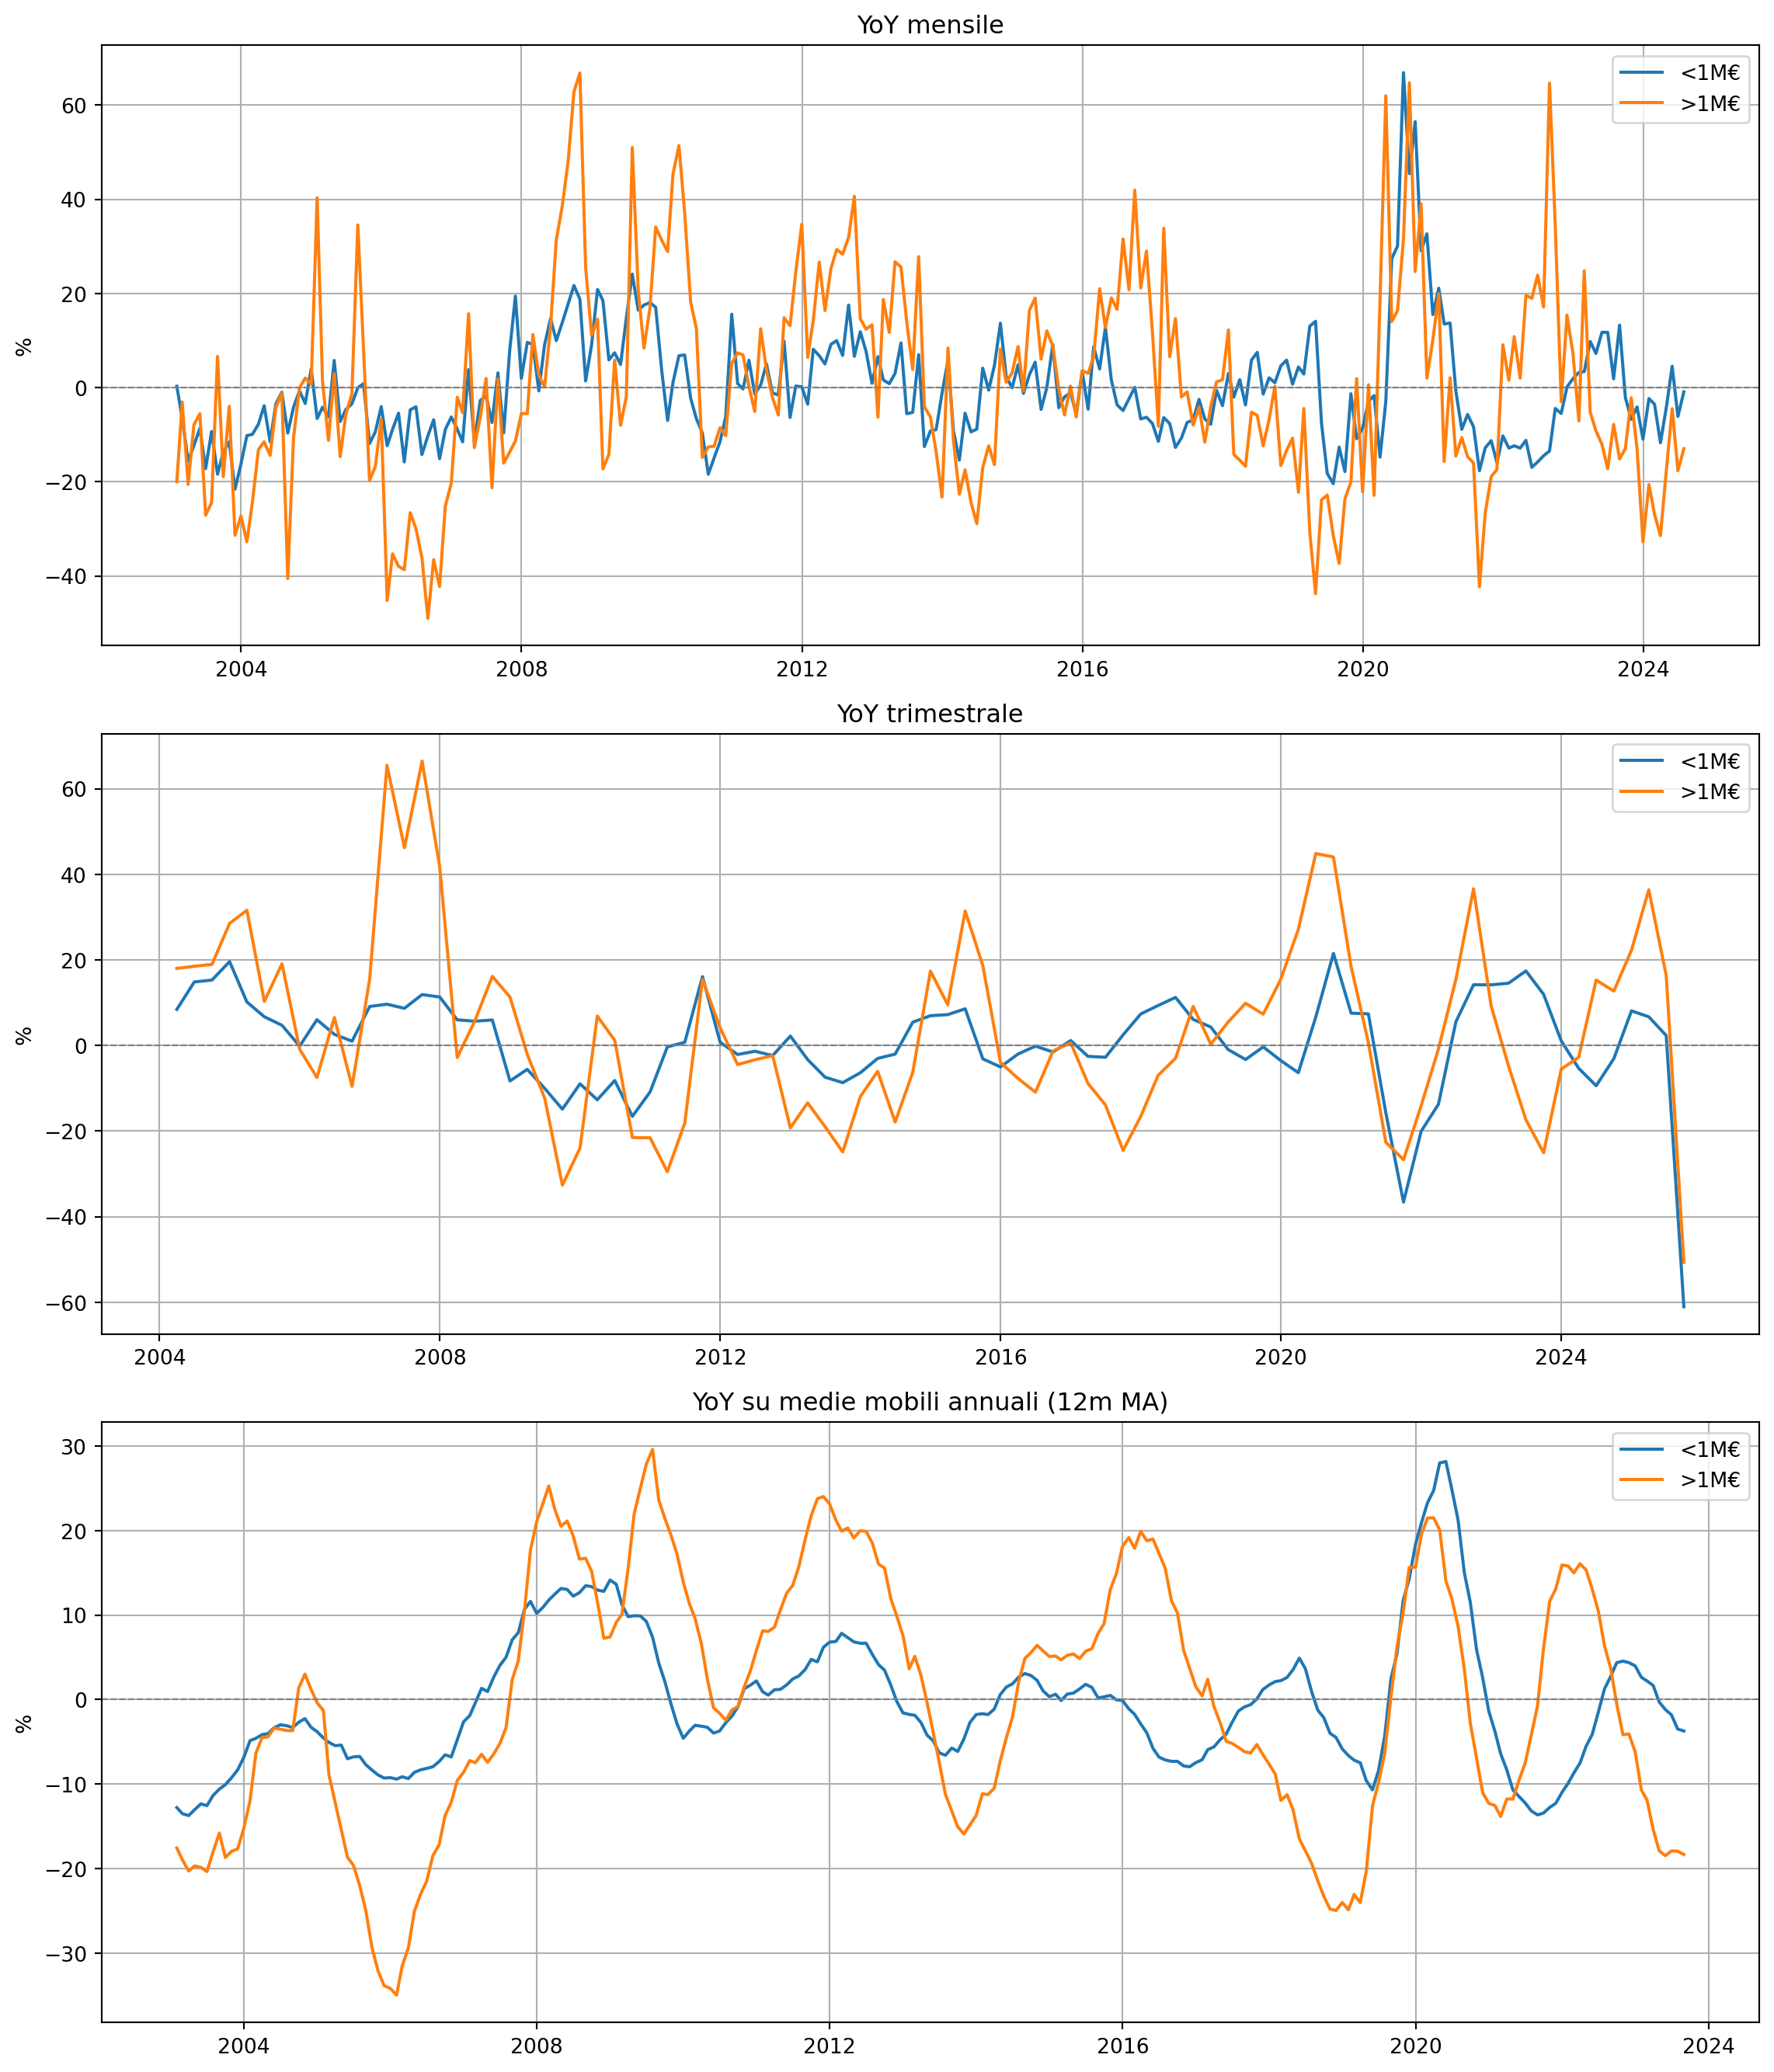

In [12]:
import matplotlib.pyplot as plt

# --- 1. YoY mensile ---
yoy_m = prestiti.pct_change(12) * 100

# --- 2. YoY trimestrale ---
prestiti_q = prestiti.resample("Q").sum()
yoy_q = prestiti_q.pct_change(4) * 100

# --- 3. YoY su media mobile annuale ---
prestiti_ma = prestiti.rolling(12).mean()
yoy_ma = prestiti_ma.pct_change(12) * 100

# --- Plot ---
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharey=False)

# 1. Mensile
axes[0].plot(yoy_m.index, yoy_m["Prestiti - Tot. - < 1M€"], label="<1M€")
axes[0].plot(yoy_m.index, yoy_m["Prestiti - Tot. - > 1M€"], label=">1M€")
axes[0].axhline(0, color="gray", ls="--", lw=0.8)
axes[0].set_title("YoY mensile")
axes[0].set_ylabel("%")
axes[0].legend(); axes[0].grid(True)

# 2. Trimestrale
axes[1].plot(yoy_q.index, yoy_q["Prestiti - Tot. - < 1M€"], label="<1M€")
axes[1].plot(yoy_q.index, yoy_q["Prestiti - Tot. - > 1M€"], label=">1M€")
axes[1].axhline(0, color="gray", ls="--", lw=0.8)
axes[1].set_title("YoY trimestrale")
axes[1].set_ylabel("%")
axes[1].legend(); axes[1].grid(True)

# 3. Media mobile annuale
axes[2].plot(yoy_ma.index, yoy_ma["Prestiti - Tot. - < 1M€"], label="<1M€")
axes[2].plot(yoy_ma.index, yoy_ma["Prestiti - Tot. - > 1M€"], label=">1M€")
axes[2].axhline(0, color="gray", ls="--", lw=0.8)
axes[2].set_title("YoY su medie mobili annuali (12m MA)")
axes[2].set_ylabel("%")
axes[2].legend(); axes[2].grid(True)

plt.tight_layout()
plt.show()

C:\Users\paolo\AppData\Local\Temp\ipykernel_33236\2466669365.py:5: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



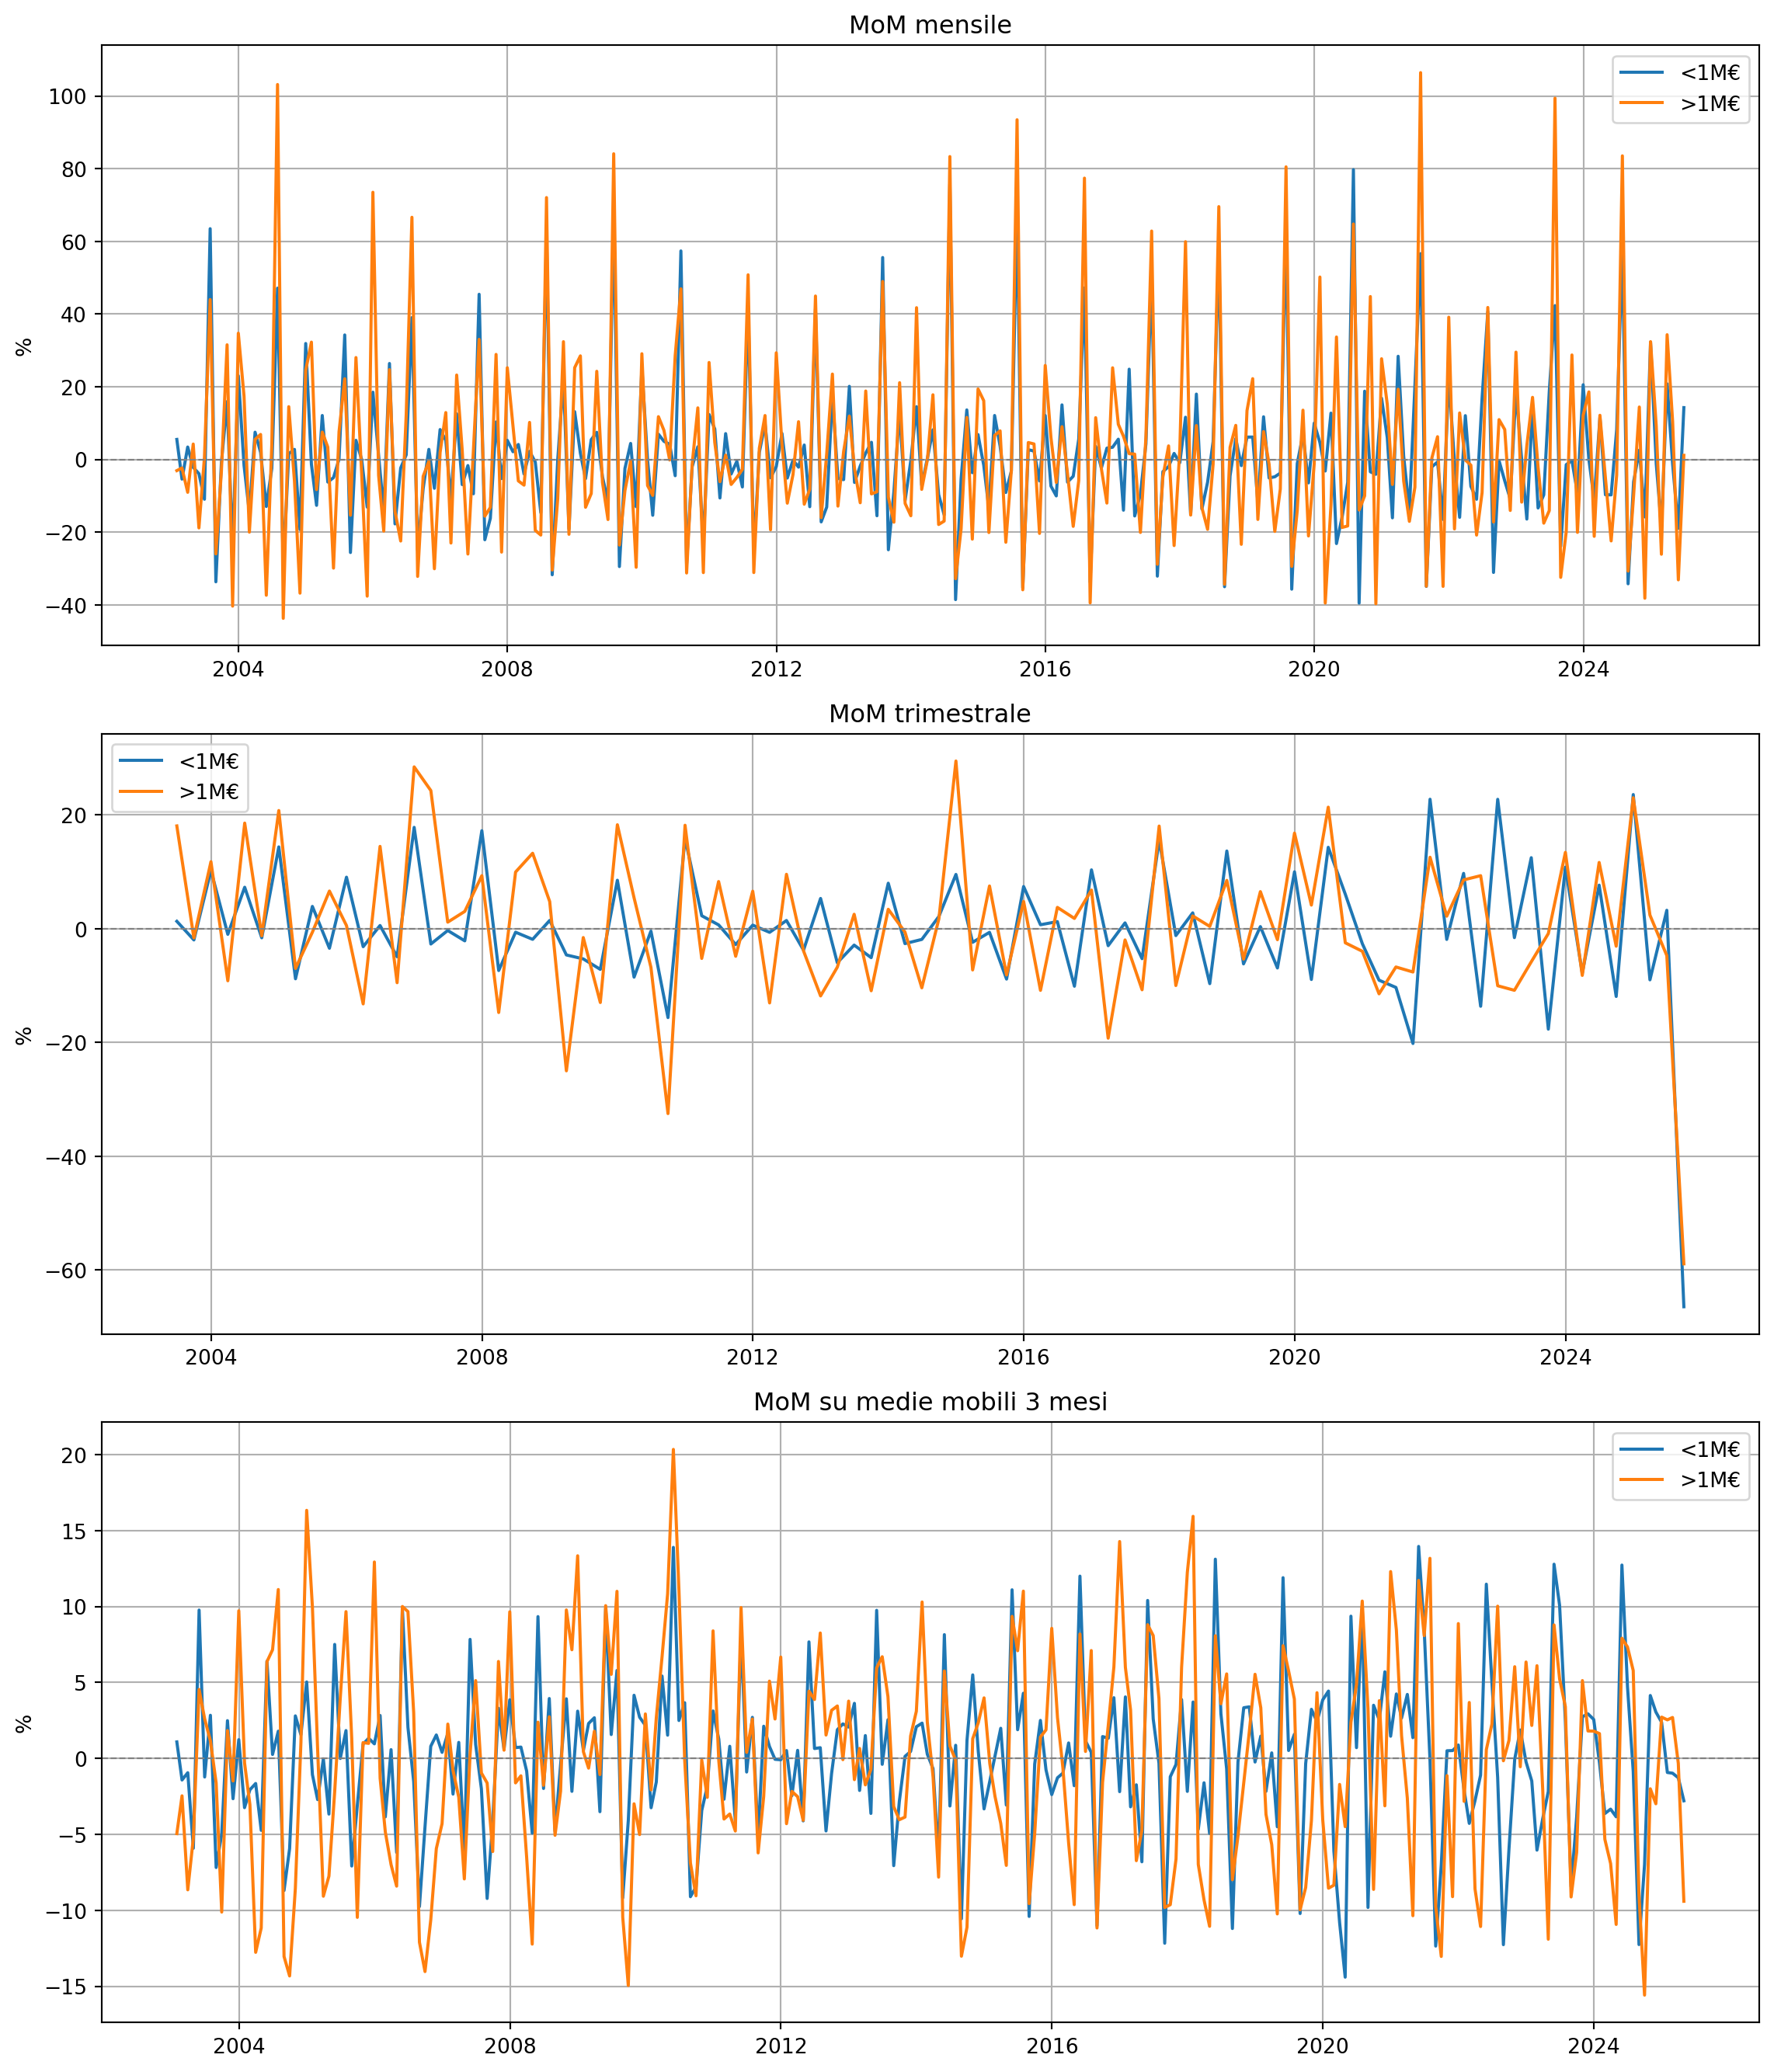

In [13]:
# --- 1. MoM mensile ---
mom_m = prestiti.pct_change(1) * 100

# --- 2. MoM trimestrale ---
prestiti_q = prestiti.resample("Q").sum()
mom_q = prestiti_q.pct_change(1) * 100

# --- 3. MoM su media mobile 3 mesi ---
prestiti_ma3 = prestiti.rolling(3).mean()
mom_ma3 = prestiti_ma3.pct_change(1) * 100

# --- Plot ---
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharey=False)

# 1. Mensile
axes[0].plot(mom_m.index, mom_m["Prestiti - Tot. - < 1M€"], label="<1M€")
axes[0].plot(mom_m.index, mom_m["Prestiti - Tot. - > 1M€"], label=">1M€")
axes[0].axhline(0, color="gray", ls="--", lw=0.8)
axes[0].set_title("MoM mensile")
axes[0].set_ylabel("%")
axes[0].legend(); axes[0].grid(True)

# 2. Trimestrale
axes[1].plot(mom_q.index, mom_q["Prestiti - Tot. - < 1M€"], label="<1M€")
axes[1].plot(mom_q.index, mom_q["Prestiti - Tot. - > 1M€"], label=">1M€")
axes[1].axhline(0, color="gray", ls="--", lw=0.8)
axes[1].set_title("MoM trimestrale")
axes[1].set_ylabel("%")
axes[1].legend(); axes[1].grid(True)

# 3. Media mobile 3 mesi
axes[2].plot(mom_ma3.index, mom_ma3["Prestiti - Tot. - < 1M€"], label="<1M€")
axes[2].plot(mom_ma3.index, mom_ma3["Prestiti - Tot. - > 1M€"], label=">1M€")
axes[2].axhline(0, color="gray", ls="--", lw=0.8)
axes[2].set_title("MoM su medie mobili 3 mesi")
axes[2].set_ylabel("%")
axes[2].legend(); axes[2].grid(True)

plt.tight_layout()
plt.show()

In [14]:
df['SERIE'].unique()

array(['BAM_MIR.M.1300010.MIR5427.9.951.47.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5427.9.951.46.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5427.9.951.1000.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5414.9.951.47.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5414.9.951.46.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5414.9.951.1000.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5411.9.951.47.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5411.9.951.46.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5411.9.951.1000.SBI77.EUR.110.997',
       'BAM_MIR.M.1300010.MIR5411.5.951.1000.SBI77.EUR.110.997'],
      dtype=object)